In [6]:
# importing required libraries
import gym
import numpy as np
import matplotlib.pyplot as mathplot

In [7]:
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines.deepq.policies import MlpPolicy
from stable_baselines import DQN

env = gym.make('CartPole-v1')
# Creating the Vectorized environments to ease the Training Process

env = DummyVecEnv([lambda: env])  
# The algorithm requires a vectorized environment to run

model = DQN(MlpPolicy, env, verbose=1)
# Training the agent
model.learn(total_timesteps=10000)
rewards=[0]
obs = env.reset()
episodes=10000
for eps in range(episodes):
    obs = env.reset()
    R = 0
    env.render()
    while True:
        # action, reward, dones and obs all are array
        action, _states = model.predict(obs) 
        obs, reward, dones, info = env.step(action) 
        R += reward[0]
        if dones[0]:
            break
    rewards.append(R)

--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 100      |
| mean 100 episode reward | 47       |
| steps                   | 4652     |
--------------------------------------


In [8]:
env.close()

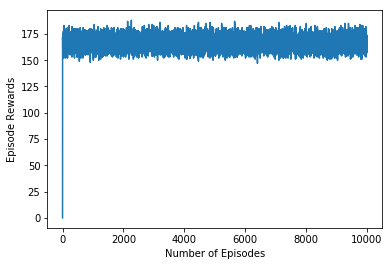

In [9]:
mathplot.ylabel("Episode Rewards")
mathplot.xlabel("Number of Episodes")
mathplot.plot([i for i in range(episodes+1)],rewards)